In [1]:
import numpy as np

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
DigitData=load_digits()

DigitData

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
DigitData['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
DigitData.data.shape

(1797, 64)

Dividing the data into Train set and test set

In [5]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(DigitData.data,DigitData.target,test_size=0.20,random_state=20)

Scaling the data using Standard scaling


In [6]:
scaling=StandardScaler()

In [7]:
scaling.fit(Xtrain,Xtest)

StandardScaler(copy=True, with_mean=True, with_std=True)

Prior to the Standard Scaling the train data looked like:

In [8]:
plot=Xtrain
plot

array([[ 0.,  0.,  2., ...,  6.,  0.,  0.],
       [ 0.,  0.,  4., ..., 12.,  5.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0., 15., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15., 10.,  0.],
       [ 0.,  0.,  8., ..., 15.,  1.,  0.]])

After Standard Scaling the train data looked like!

In [9]:
Xtest=scaling.transform(Xtest)
Xtrain=scaling.transform(Xtrain)
Xtrain

array([[ 0.        , -0.34417111, -0.68903384, ..., -0.13797034,
        -0.51674858, -0.20263257],
       [ 0.        , -0.34417111, -0.27257048, ...,  0.87357751,
         0.68520627, -0.20263257],
       [ 0.        , -0.34417111, -0.27257048, ..., -1.14951819,
        -0.51674858, -0.20263257],
       ...,
       [ 0.        , -0.34417111,  2.01797797, ..., -1.14951819,
        -0.51674858, -0.20263257],
       [ 0.        , -0.34417111, -1.10549719, ...,  1.37935143,
         1.88716113, -0.20263257],
       [ 0.        , -0.34417111,  0.56035623, ...,  1.37935143,
        -0.27635761, -0.20263257]])

Now, applying the PCA to reduce the dimension

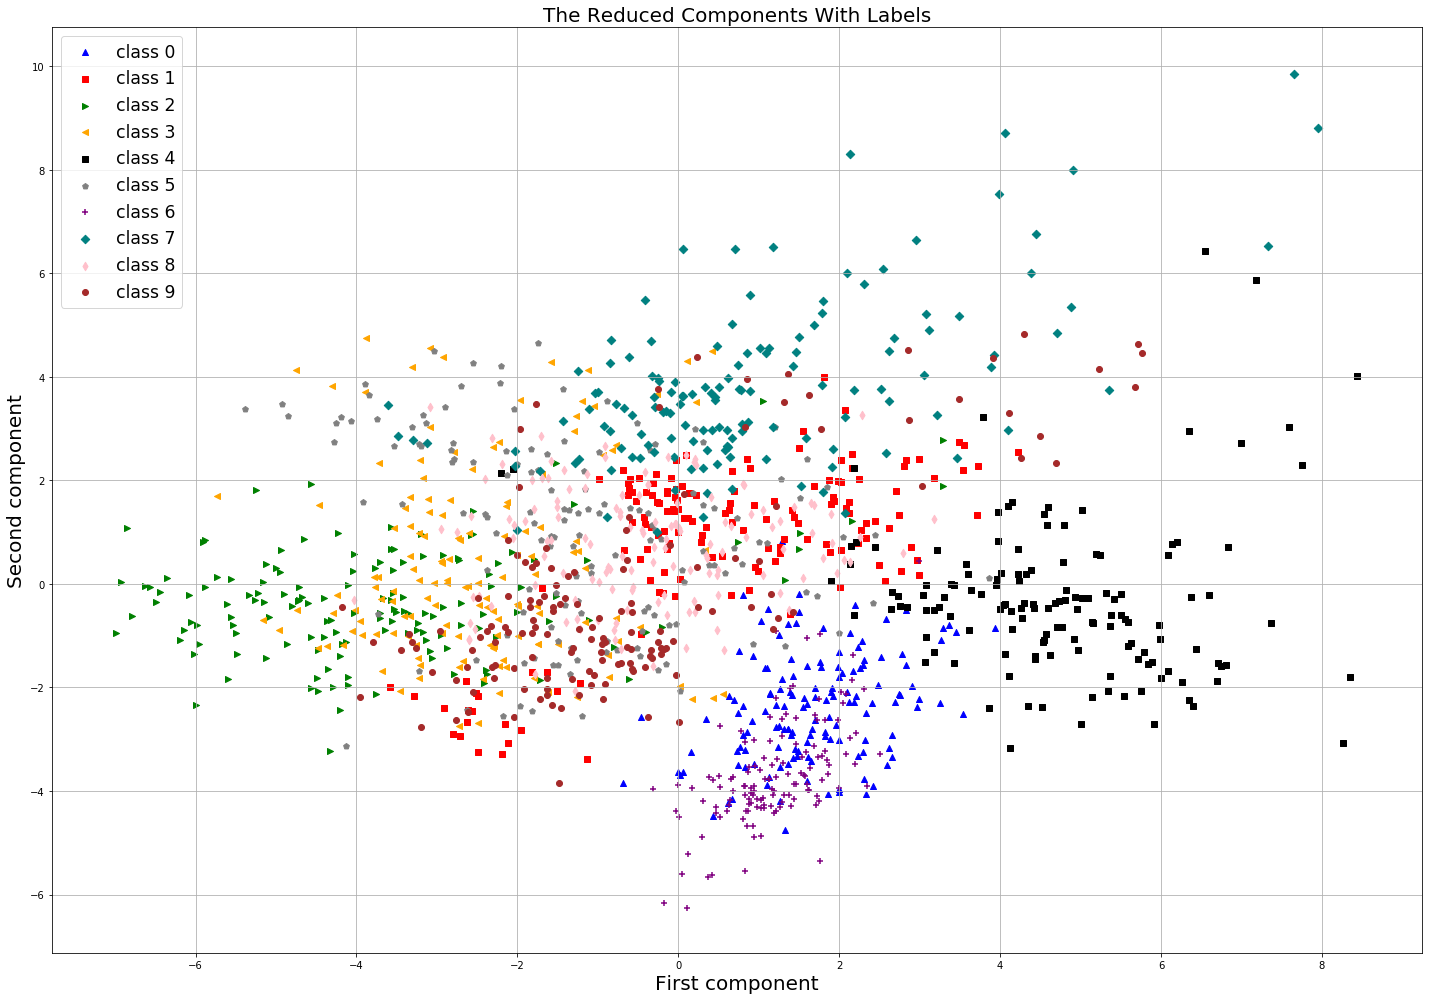

In [10]:
fitting_into_PCA=PCA(n_components=2)

fitting_into_PCA.fit(Xtrain)

postPCA_Xtrain=fitting_into_PCA.transform(Xtrain)
postPCA_Xtest=fitting_into_PCA.transform(Xtest)

fig,(ax1)=plt.subplots(figsize=(20,14))
for a,b,c in zip(range(0, 10), ('blue', 'red', 'green','orange','black','gray','purple','teal','pink','brown'), ('^', 's', '>','<','s','p','+','D','d','o')):
    ax1.scatter(postPCA_Xtrain[Ytrain == a,0], 
                postPCA_Xtrain[Ytrain == a,1], label='class %s' % a, alpha=1, c=b, marker=c)
ax1.set_title('The Reduced Components With Labels',fontsize=20)
ax1.set_xlabel('First component',fontsize=20)
ax1.set_ylabel('Second component',fontsize=20)    
ax1.legend(loc='best',fontsize='xx-large')
ax1.grid()

plt.tight_layout()

plt.show()

Variance of the components

In [11]:
fitting_into_PCA.explained_variance_

array([7.36778446, 5.71865768])

The percent of the data represented by two principal components

In [12]:
fitting_into_PCA.explained_variance_ratio_

print(np.sum(fitting_into_PCA.explained_variance_ratio_)*100)

21.795558932361452


Hence, it is not sufficient. So, we should find more components. 

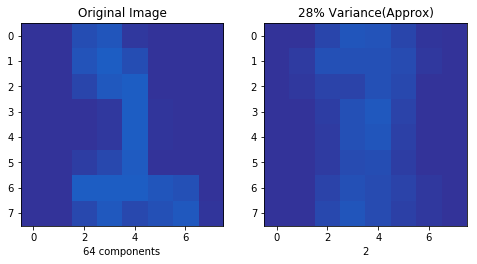

In [13]:
fitter=PCA(n_components=2)
fitter.fit(plot)
pplot=fitter.transform(plot)
approximation=fitter.inverse_transform(pplot)
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(plot[8].reshape(8, 8),
              cmap = plt.cm.terrain, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('64 components')
plt.title('Original Image');

# 20 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[8].reshape(8, 8),
              cmap = plt.cm.terrain, interpolation='nearest',
              clim=(0, 255));
plt.xlabel(fitter.n_components_)
plt.title(str(int(np.sum(fitter.explained_variance_ratio_)*100))+ "% Variance(Approx)");

So, I tried measuring the accuracy score of how predicting after PCA is faster implemented.I used KNeighbors Classifier for that purpose. And, more the variance captured by the PCA components more is the score.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

predictor=KNeighborsClassifier()
predictor.fit(postPCA_Xtrain,Ytrain)
#Xtest=fitting_into_PCA.transform(Xtest)

Ypred=predictor.predict(postPCA_Xtest)

metrics.accuracy_score(Ytest, Ypred)

0.5472222222222223

Now, for the K-mean Clustering,

In [15]:
from sklearn.datasets import load_digits 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

Now, loading the data

In [16]:
digit=load_digits()

In [17]:
popData=digit.data
target=digit.target

Now, scaling the data using Standard Scalar

In [18]:
scaling.fit(popData)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
popData=scaling.transform(popData)

Plotting the first 10 images 

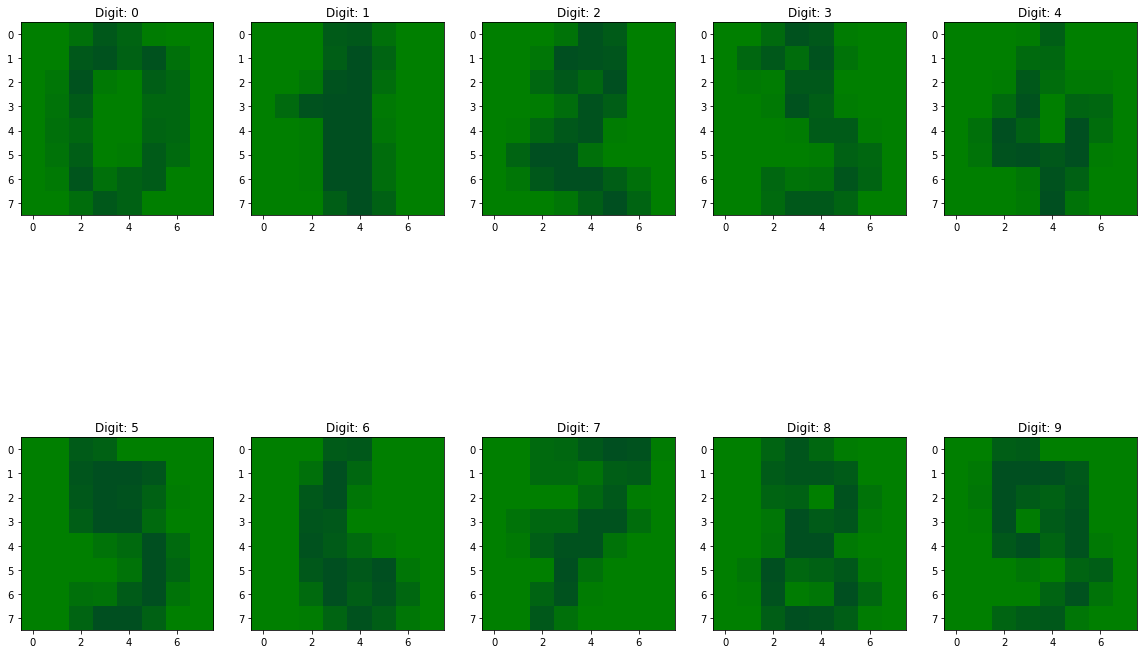

In [20]:
fig,ax=plt.subplots(2,5,figsize=(20,14));
for axi,i in zip(ax.flat,range(20)):
    axi.imshow(digit.images[i].reshape(8, 8),
                  cmap = plt.cm.ocean, interpolation='nearest',
                  clim=(0, 125));
    axi.set_title('Digit: %s' %digit.target[i])

Dividing the dataset into training set and test set

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(popData,target,test_size=0.20,random_state=20)

Performing k-Means clustering in the training data set

In [22]:
kmeans=KMeans(n_clusters=10)

kmeans.fit_predict(xtrain)

array([1, 3, 7, ..., 7, 4, 3], dtype=int32)

In [23]:
kmeans.cluster_centers_

array([[ 0.00000000e+00, -2.72897659e-01,  4.66550538e-01,
         5.09495289e-01, -9.70077044e-01, -8.24238968e-01,
        -4.09723921e-01, -1.25022923e-01, -5.90775571e-02,
         8.56662702e-02,  2.93273562e-01,  1.89361601e-01,
         3.43421197e-03, -6.69129674e-01, -4.91421184e-01,
        -1.30433381e-01,  1.81265791e-01,  9.96245695e-02,
        -8.20068907e-02, -4.00276609e-02,  3.87919158e-01,
        -3.71118649e-01, -4.49404609e-01, -1.14221844e-01,
        -3.33797263e-02, -3.68702811e-01, -7.81501802e-01,
        -5.49167699e-01,  1.76734387e-01, -3.57826366e-01,
        -5.63927449e-01, -4.72323823e-02,  0.00000000e+00,
        -6.52132447e-01, -1.04554185e+00, -6.09299566e-01,
         4.05036540e-01, -7.21922899e-01, -7.86848964e-01,
         0.00000000e+00, -6.13436689e-02, -5.31284098e-01,
        -9.21387627e-01, -3.76177264e-02,  7.79361439e-01,
        -7.14354216e-01, -6.97430371e-01, -4.29041104e-02,
        -3.54332626e-02, -3.06755782e-01, -6.73755993e-0

In [24]:
kmeans.labels_

array([1, 3, 7, ..., 7, 4, 3], dtype=int32)

Plotting all the cluster centers to see how k-Means clustering performed compared to our actual images

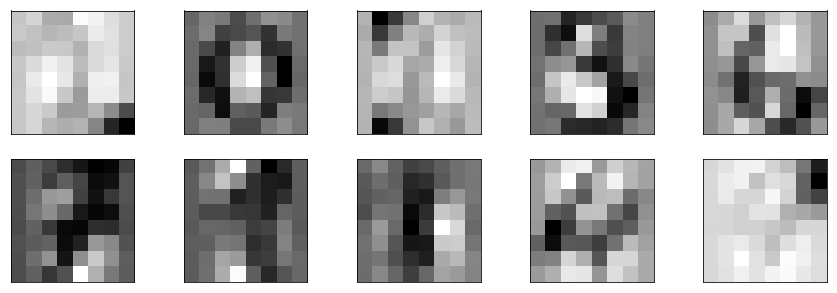

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi,i in zip(ax.flat,centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(i,cmap = plt.cm.binary, interpolation='nearest');
   

Now, predicting the labels for the training set

In [26]:
ypredClusters=kmeans.predict(xtest)
ypredClusters

array([1, 5, 7, 3, 3, 7, 3, 3, 5, 1, 6, 8, 5, 9, 1, 6, 6, 7, 0, 3, 5, 7,
       8, 4, 6, 1, 7, 1, 3, 8, 2, 6, 4, 5, 7, 8, 3, 5, 8, 1, 4, 3, 1, 8,
       7, 9, 8, 3, 4, 3, 3, 0, 2, 3, 5, 3, 5, 4, 3, 3, 4, 4, 5, 4, 4, 3,
       1, 2, 3, 3, 1, 5, 3, 7, 3, 3, 3, 1, 7, 7, 7, 3, 7, 8, 7, 6, 5, 9,
       7, 7, 1, 8, 4, 6, 6, 5, 7, 3, 7, 3, 6, 4, 5, 7, 0, 7, 8, 1, 7, 3,
       4, 3, 2, 7, 0, 7, 1, 4, 2, 3, 3, 8, 0, 3, 8, 1, 4, 5, 5, 3, 7, 5,
       3, 2, 8, 7, 2, 7, 3, 7, 5, 3, 2, 1, 1, 4, 2, 4, 3, 1, 6, 1, 1, 3,
       5, 7, 0, 8, 1, 7, 4, 2, 4, 1, 8, 7, 5, 3, 7, 6, 3, 4, 8, 8, 6, 2,
       7, 1, 5, 5, 3, 0, 2, 3, 1, 5, 2, 6, 4, 5, 3, 7, 7, 7, 4, 8, 4, 7,
       5, 4, 7, 1, 3, 4, 7, 7, 7, 3, 0, 3, 7, 7, 4, 9, 7, 1, 7, 7, 8, 5,
       1, 9, 4, 8, 5, 4, 7, 7, 3, 7, 7, 8, 4, 7, 5, 4, 7, 3, 3, 4, 7, 7,
       7, 7, 3, 3, 3, 1, 3, 5, 3, 3, 0, 5, 1, 1, 7, 5, 3, 4, 3, 7, 4, 3,
       4, 3, 3, 3, 5, 8, 8, 1, 5, 6, 7, 4, 7, 8, 6, 8, 7, 4, 3, 5, 5, 3,
       2, 2, 4, 8, 1, 8, 0, 2, 3, 3, 0, 3, 1, 6, 9,

Since, the labels returned by the k-Means clustering algorithm is different from the original labels of the data. We perform mode operation on the k-Means labels comparing it to the target labels. Hence, converting it in a way it represents the actual label of the data.

In [27]:
from scipy.stats import mode

labels = np.zeros_like(ypredClusters)
for i in range(10):
    mask = (ypredClusters == i)
    labels[mask] = mode(ytest[mask])[0]
labels

array([0, 7, 8, 3, 3, 8, 3, 3, 7, 0, 1, 4, 7, 7, 0, 1, 1, 8, 1, 3, 7, 8,
       4, 6, 1, 0, 8, 0, 3, 4, 2, 1, 6, 7, 8, 4, 3, 7, 4, 0, 6, 3, 0, 4,
       8, 7, 4, 3, 6, 3, 3, 1, 2, 3, 7, 3, 7, 6, 3, 3, 6, 6, 7, 6, 6, 3,
       0, 2, 3, 3, 0, 7, 3, 8, 3, 3, 3, 0, 8, 8, 8, 3, 8, 4, 8, 1, 7, 7,
       8, 8, 0, 4, 6, 1, 1, 7, 8, 3, 8, 3, 1, 6, 7, 8, 1, 8, 4, 0, 8, 3,
       6, 3, 2, 8, 1, 8, 0, 6, 2, 3, 3, 4, 1, 3, 4, 0, 6, 7, 7, 3, 8, 7,
       3, 2, 4, 8, 2, 8, 3, 8, 7, 3, 2, 0, 0, 6, 2, 6, 3, 0, 1, 0, 0, 3,
       7, 8, 1, 4, 0, 8, 6, 2, 6, 0, 4, 8, 7, 3, 8, 1, 3, 6, 4, 4, 1, 2,
       8, 0, 7, 7, 3, 1, 2, 3, 0, 7, 2, 1, 6, 7, 3, 8, 8, 8, 6, 4, 6, 8,
       7, 6, 8, 0, 3, 6, 8, 8, 8, 3, 1, 3, 8, 8, 6, 7, 8, 0, 8, 8, 4, 7,
       0, 7, 6, 4, 7, 6, 8, 8, 3, 8, 8, 4, 6, 8, 7, 6, 8, 3, 3, 6, 8, 8,
       8, 8, 3, 3, 3, 0, 3, 7, 3, 3, 1, 7, 0, 0, 8, 7, 3, 6, 3, 8, 6, 3,
       6, 3, 3, 3, 7, 4, 4, 0, 7, 1, 8, 6, 8, 4, 1, 4, 8, 6, 3, 7, 7, 3,
       2, 2, 6, 4, 0, 4, 1, 2, 3, 3, 1, 3, 0, 1, 7,

After that, we calculate the accuracy of our k-Means clustering labels against the original data target set.

In [28]:
from sklearn.metrics import accuracy_score
import seaborn as sns
accuracy_score(ytest,labels)

0.6472222222222223

Now, for confusion matrix we import confusion matrix from scikit library, and since we are comparing 10 original labels against 10 predicted labels, we use heatmap function from seaborn library for better representation of the result

Text(0.5, 1.0, 'Confusion Matrix for without PCA k-Means Clustering')

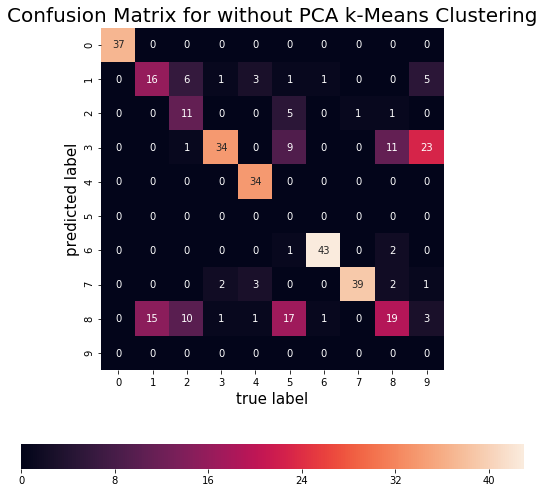

In [29]:
con=confusion_matrix(ytest,labels)
fig,ax=plt.subplots(figsize=(9,9))
ax=sns.heatmap(con.T, square=True, annot=True, cbar=True,cbar_kws={"orientation": "horizontal"},
            xticklabels=digit.target_names,
            yticklabels=digit.target_names)
plt.xlabel('true label',fontsize=15)
plt.ylabel('predicted label',fontsize=15);
plt.title('Confusion Matrix for without PCA k-Means Clustering',fontsize=20)

What, we can conclude is that, it was difficulty recognizing the true label of digits 8 and 9 more than any other digits. 

Now, we are doing k-Means clustering on the data after PCA is used to reduce dimension

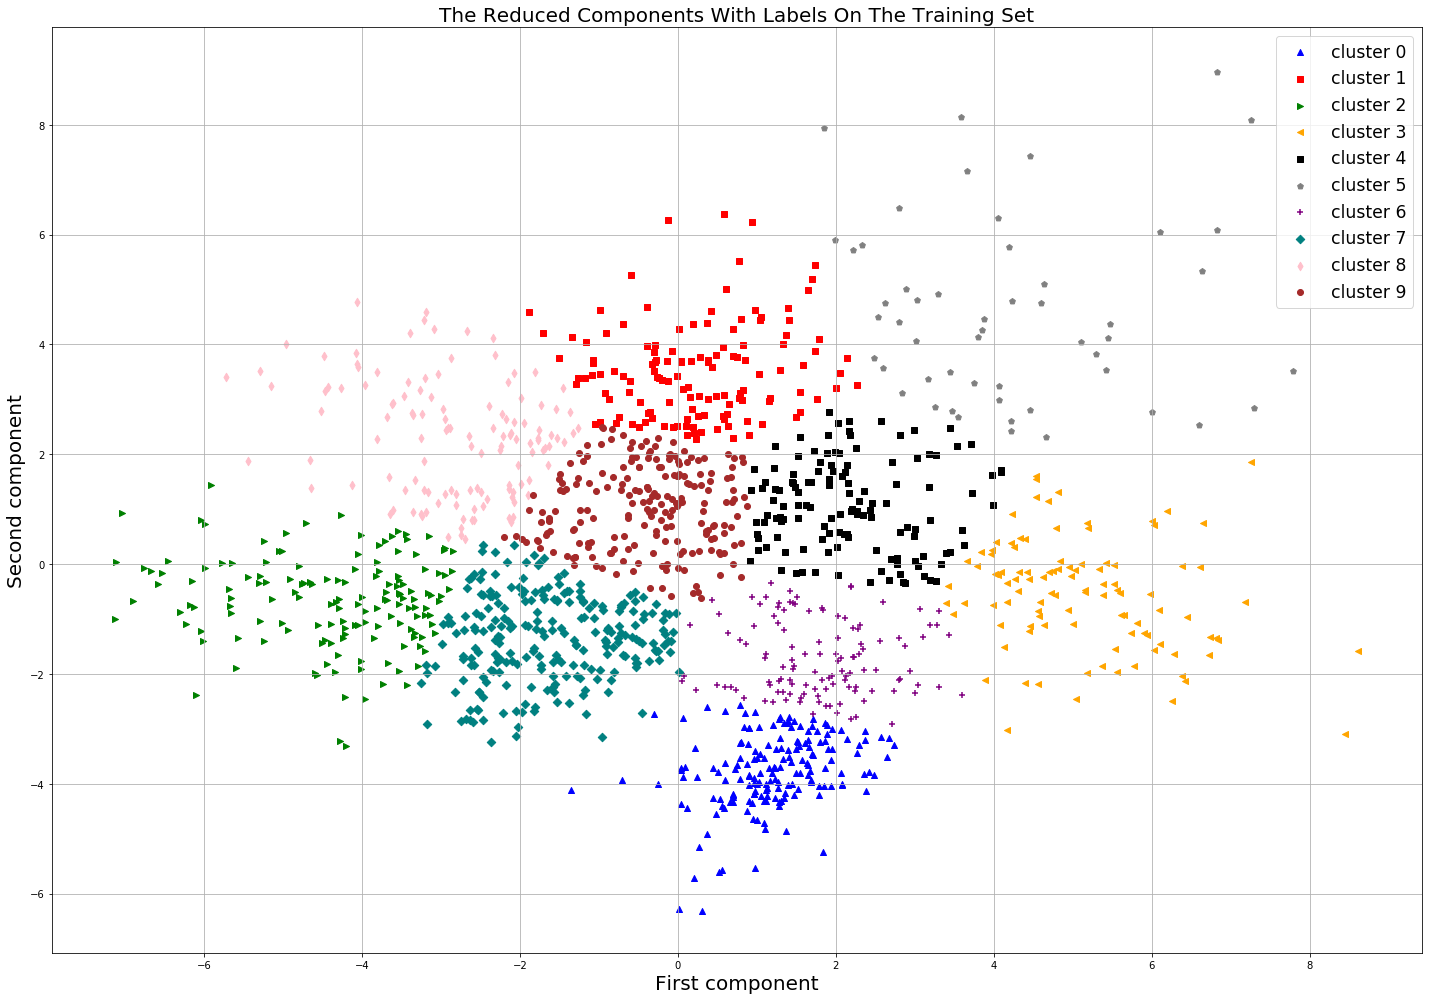

In [30]:
fitting_into_PCA=PCA(n_components=2)

fitting_into_PCA.fit(xtrain)

postPCA_Xtrain=fitting_into_PCA.transform(xtrain)

kmeans2=KMeans(n_clusters=10)

kmeanslabels=kmeans2.fit_predict(postPCA_Xtrain)

fig,(ax1)=plt.subplots(figsize=(20,14))
for a,b,c in zip(range(0, 10), ('blue', 'red', 'green','orange','black','gray','purple','teal','pink','brown'), ('^', 's', '>','<','s','p','+','D','d','o')):
    ax1.scatter(postPCA_Xtrain[kmeanslabels == a,0], 
                postPCA_Xtrain[kmeanslabels == a,1], label='cluster %s' % a, alpha=1, c=b, marker=c)
ax1.set_title('The Reduced Components With Labels On The Training Set',fontsize=20)
ax1.set_xlabel('First component',fontsize=20)
ax1.set_ylabel('Second component',fontsize=20)    
ax1.legend(loc='best',fontsize='xx-large')
ax1.grid()

plt.tight_layout()

plt.show()

Now, we do it for the test set,

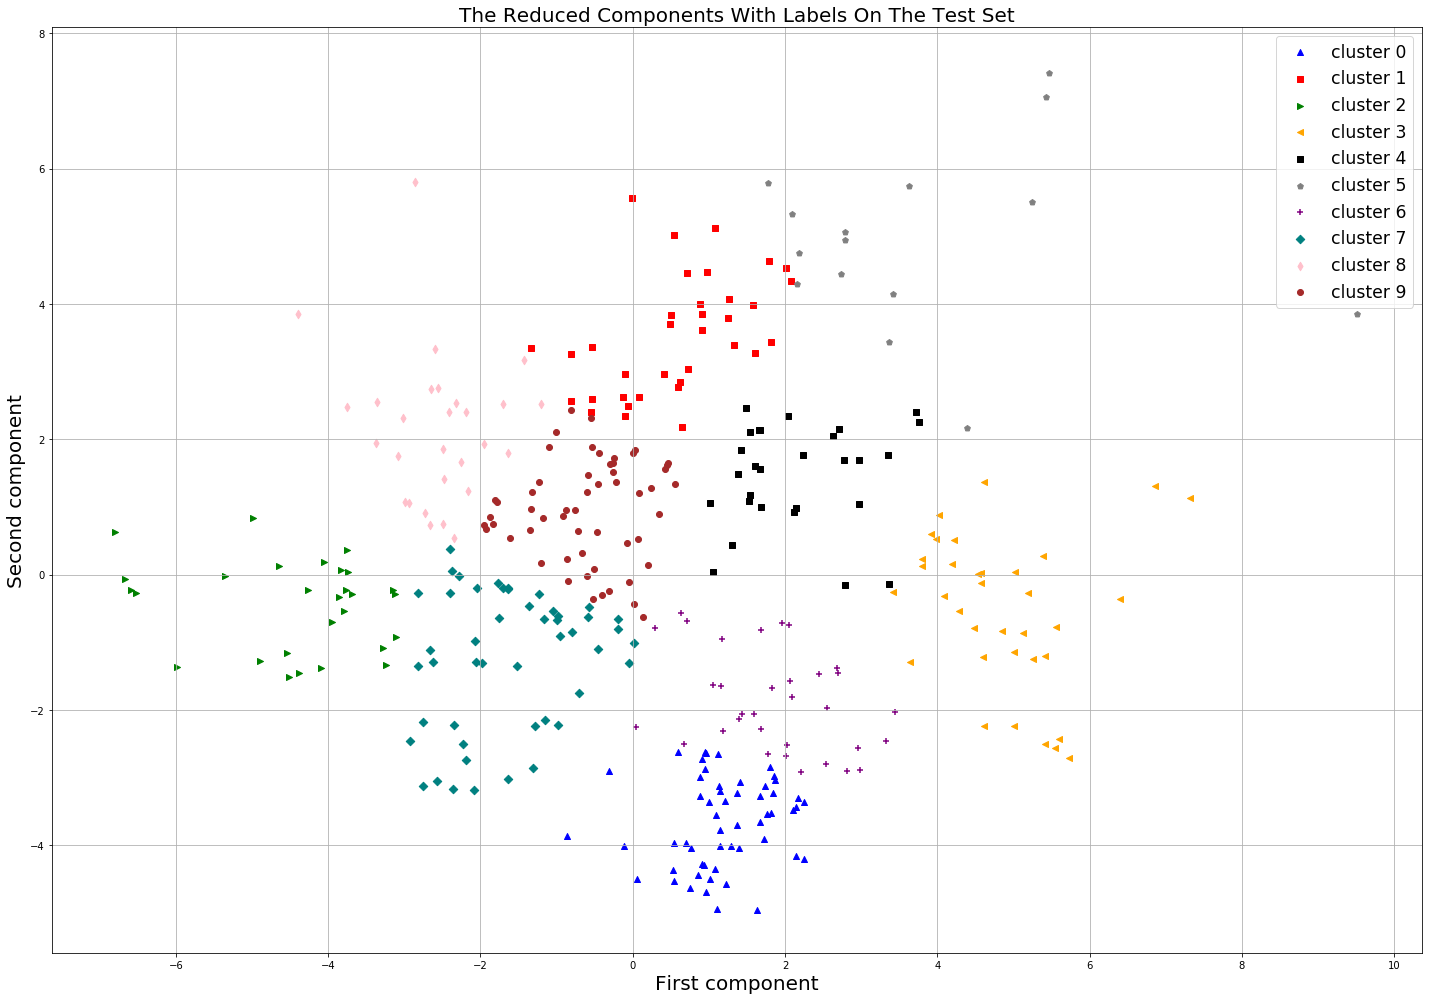

In [31]:
postPCA_Xtest=fitting_into_PCA.transform(xtest)
ypredlabels=kmeans2.predict(postPCA_Xtest)

fig,(ax1)=plt.subplots(figsize=(20,14))
for a,b,c in zip(range(0, 10), ('blue', 'red', 'green','orange','black','gray','purple','teal','pink','brown'), ('^', 's', '>','<','s','p','+','D','d','o')):
    ax1.scatter(postPCA_Xtest[ypredlabels == a,0], 
                postPCA_Xtest[ypredlabels == a,1], label='cluster %s' % a, alpha=1, c=b, marker=c)
ax1.set_title('The Reduced Components With Labels On The Test Set',fontsize=20)
ax1.set_xlabel('First component',fontsize=20)
ax1.set_ylabel('Second component',fontsize=20)    
ax1.legend(loc='best',fontsize='xx-large')
ax1.grid()

plt.tight_layout()

plt.show()

Now, we use the mode function to fix the label data in correspondence to the predict the data.

In [32]:
from scipy.stats import mode

labels2 = np.zeros_like(ypredlabels)
for i in range(10):
    mask = (ypredlabels == i)
    labels2[mask] = mode(ytest[mask])[0]
labels2

array([6, 7, 7, 9, 8, 1, 2, 3, 7, 0, 1, 4, 7, 7, 6, 1, 1, 8, 9, 3, 8, 3,
       4, 6, 1, 6, 7, 0, 0, 4, 3, 1, 6, 7, 8, 4, 3, 1, 1, 6, 0, 8, 6, 4,
       3, 7, 4, 3, 6, 9, 8, 9, 2, 0, 7, 2, 7, 9, 8, 9, 6, 0, 8, 6, 0, 3,
       0, 3, 3, 9, 6, 7, 2, 2, 9, 0, 3, 6, 8, 8, 9, 9, 3, 4, 1, 7, 7, 7,
       1, 3, 0, 4, 6, 1, 1, 7, 7, 9, 8, 3, 4, 6, 7, 8, 9, 8, 4, 6, 8, 3,
       6, 8, 3, 8, 6, 0, 0, 6, 2, 9, 9, 1, 9, 2, 4, 0, 0, 7, 7, 9, 8, 7,
       9, 2, 4, 2, 3, 8, 2, 9, 1, 9, 3, 6, 0, 6, 2, 6, 9, 6, 7, 0, 6, 8,
       7, 8, 9, 4, 6, 8, 6, 2, 6, 0, 4, 9, 7, 9, 2, 4, 2, 6, 4, 4, 1, 2,
       8, 0, 7, 7, 9, 9, 2, 9, 6, 7, 2, 1, 6, 7, 8, 7, 8, 7, 6, 4, 6, 8,
       3, 6, 8, 0, 8, 6, 8, 7, 1, 8, 9, 9, 7, 8, 6, 7, 3, 0, 8, 2, 4, 7,
       6, 7, 0, 4, 7, 6, 3, 7, 2, 3, 8, 4, 6, 1, 7, 6, 8, 8, 8, 6, 8, 0,
       8, 8, 8, 8, 9, 0, 9, 7, 9, 8, 9, 7, 6, 0, 8, 7, 9, 6, 9, 9, 0, 8,
       0, 8, 9, 8, 7, 4, 4, 0, 7, 1, 8, 0, 7, 4, 0, 4, 8, 6, 3, 7, 1, 8,
       2, 3, 6, 4, 1, 4, 9, 2, 9, 9, 9, 9, 6, 1, 7,

In [33]:
print("Accuracy score: %s" %accuracy_score(ytest,labels2))

Accuracy score: 0.5444444444444444


Text(0.5, 1.0, 'Confusion Matrix for post-PCA test set using k-Means Algorithm')

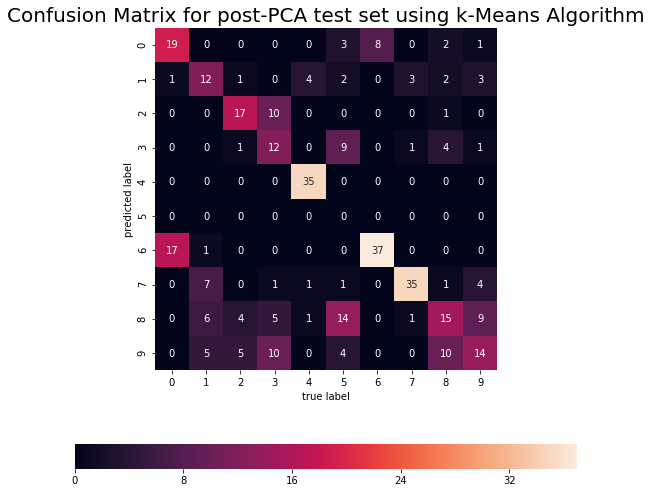

In [34]:
con=confusion_matrix(ytest,labels2)
fig,ax=plt.subplots(figsize=(9,9))
ax=sns.heatmap(con.T, square=True, annot=True, cbar=True,cbar_kws={"orientation": "horizontal"},
            xticklabels=digit.target_names,
            yticklabels=digit.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix for post-PCA test set using k-Means Algorithm', fontsize=20)

What we can conclude from above is the accuracy is reduced when we reduce the dimension but execution is faster in the reduced data. From Confusion matrix, we can conclude, 5 is difficult to recognize than any other digits.  